In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_prr = []
all_corr = []
for file in os.listdir("/home/ziniu/data_top_billed/local_model/DUB"):
    if file.startswith("uncertainty_") and file.endswith(".pkl"):
        path = os.path.join("/home/ziniu/data_top_billed/local_model/DUB", file)
        with open(path, "rb") as f:
            (prr, corr) = pickle.load(f)
        all_prr.append(prr[-1])
        all_corr.append(corr[-1])

for file in os.listdir("/home/ziniu/data_top_billed/local_model/PDX"):
    if file.startswith("uncertainty_") and file.endswith(".pkl"):
        path = os.path.join("/home/ziniu/data_top_billed/local_model/PDX", file)
        with open(path, "rb") as f:
            (prr, corr) = pickle.load(f)
        all_prr.append(prr[-1])
        all_corr.append(corr[-1])


for file in os.listdir("/home/ziniu/data_top_billed/local_model/IAD"):
    if file.startswith("uncertainty_") and file.endswith(".pkl"):
        path = os.path.join("/home/ziniu/data_top_billed/local_model/IAD", file)
        with open(path, "rb") as f:
            (prr, corr) = pickle.load(f)
        all_prr.append(prr[-1])
        all_corr.append(corr[-1])

In [4]:
np.save("prr", np.asarray(all_prr))
np.save("corr", np.asarray(all_corr))

In [5]:
all_prr=np.load("prr.npy")

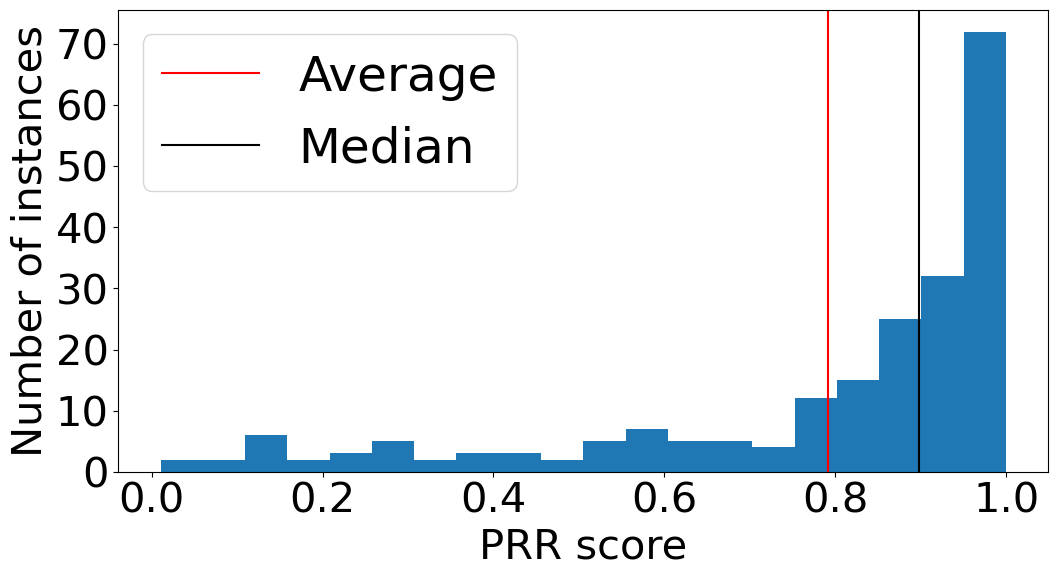

In [6]:
PRR = np.asarray(all_prr)
PRR = PRR[PRR>0]
PPR = PRR[~np.isnan(PRR)]
plt.figure(figsize=(12, 6))
plt.hist(PPR, bins=20)
plt.axvline(x = np.mean(PRR), color = 'red', label = 'Average')
plt.axvline(x = np.median(PRR), color = 'black', label = 'Median')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("PRR score", fontsize=30)
plt.ylabel("Number of instances", fontsize=30)
plt.legend(fontsize=35)
#plt.savefig("ppr_score.pdf")

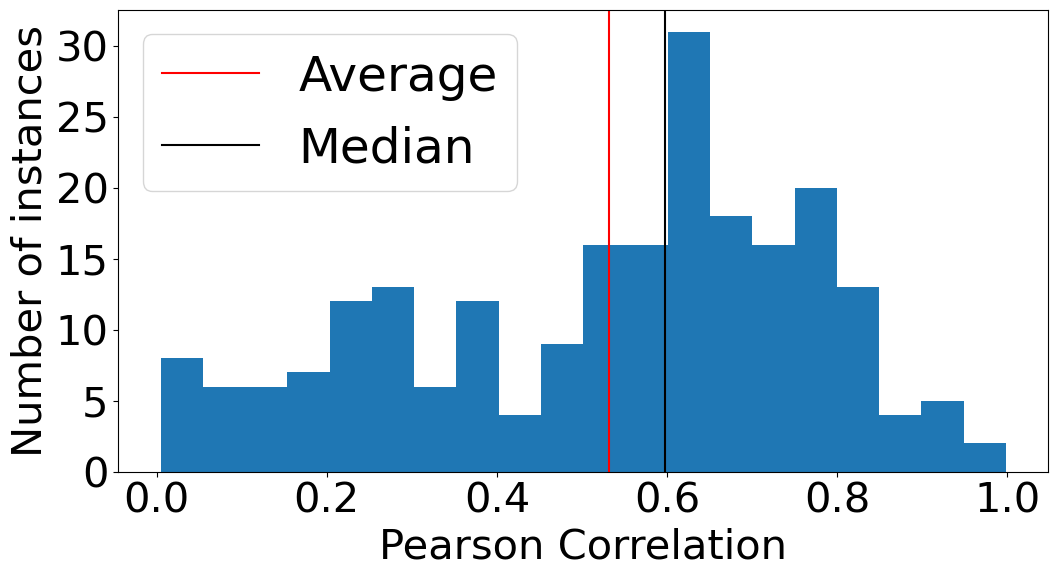

In [32]:
corr = np.asarray(all_corr)
corr = corr[~np.isnan(corr)]

plt.figure(figsize=(12, 6))
plt.hist(corr, bins=20)
plt.axvline(x = np.mean(corr), color = 'red', label = 'Average')
plt.axvline(x = np.median(corr), color = 'black', label = 'Median')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Pearson Correlation", fontsize=30)
plt.ylabel("Number of instances", fontsize=30)
plt.legend(fontsize=35)
plt.savefig("corr_score.pdf")

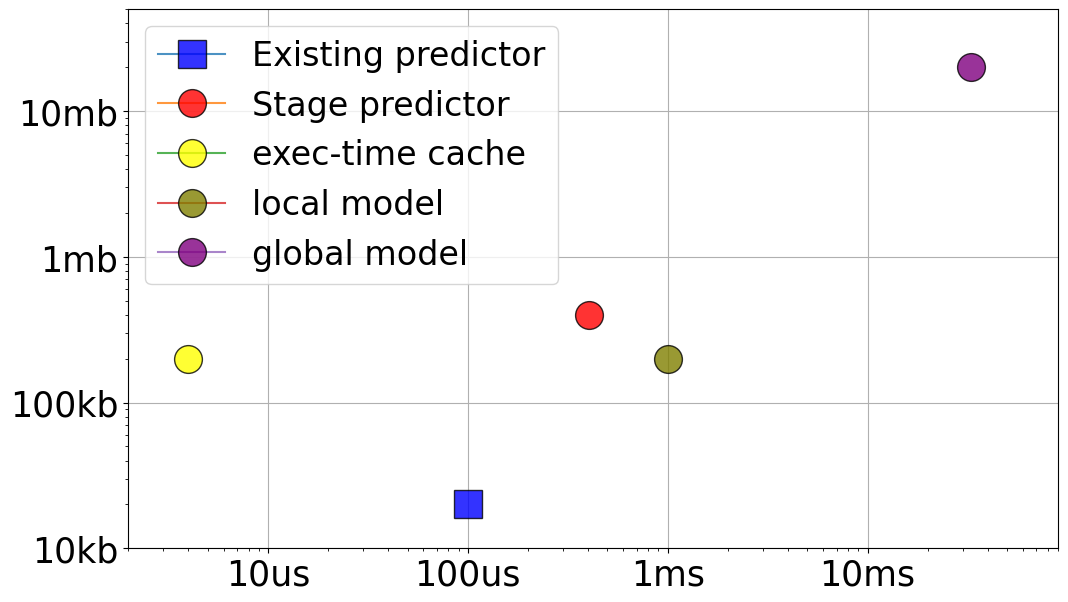

In [60]:
plt.figure(figsize=(12,7))
plt.yscale("log")
plt.ylim(10, 50000)
plt.xlim(2, 90000)
plt.xscale("log")
plt.grid()
plt.plot(100, 20, marker="s", markersize=20, alpha=0.8, markeredgecolor="black", markerfacecolor="blue", label="Existing predictor")
plt.plot(402, 400, marker="o", markersize=20, alpha=0.8, markeredgecolor="black", markerfacecolor="red", label="Stage predictor")
plt.plot(4, 200, marker="o", markersize=20, alpha=0.8,  markeredgecolor="black", markerfacecolor="yellow", label="exec-time cache")
plt.plot(1000, 200, marker="o", markersize=20, alpha=0.8, markeredgecolor="black", markerfacecolor="olive", label="local model")
plt.plot(33000, 20000, marker="o", markersize=20, alpha=0.8, markeredgecolor="black", markerfacecolor="purple", label="global model")
plt.legend(fontsize=24)
plt.xticks([10, 100, 1000, 10000], ["10us", "100us", "1ms", "10ms"], fontsize=25)
plt.yticks([10, 100, 1000, 10000], ["10kb", "100kb", "1mb", "10mb"], fontsize=25)
plt.savefig("inference_size.pdf")
plt.show()


In [ ]:
40 * 1000